**Data Description**


In the process of In Vitro Fertilisation embryos are cultivated in an incubator for 3–5 days until they reach the blastocyst stage in IVF, which is a manual fertilisation method. The best embryos (blastocysts) are chosen based on important morphological characteristics and returned to the uterus of the patient.

The dataset included Hoffman Modulation Contrast (HMC) microscopic blastocyst images captured by an Olympus IX71 inverted microscope using the Research Instrument Cronus 4 software (Falmouth, England). All images were captured at magnifications of 1.6 and 20 and objective lens. These images are from the different patients who were treated at Pacific Center for Reproduction Canada between 2012 to 2016, images are randomly chosen with a good focus on both TE and ICM. These blastocyst images were manually labeled by expert embryologists for blastocyst components. The labeled images, called ground truth (GT), were collectively made available for research purposes with the approval of the Canadian Research Ethics Board on 24 May 2017.

The dataset consists of 592 unique blastocyst RGB images. These images can be used to train the model to segment each image into its components.



In [ ]:
#pip install segmentation_models

In [ ]:
#pip install opencv-python

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
%matplotlib inline
import cv2
import os

In [36]:
#provide the dataset path below

train_dir = 'D:/College/Sem 4/Capstone/Capstone Project/AI-ML-Project---Detecting-Embryo-Components-to-Improve-Success-Rate-of-IVF/Data/Train/'
imgs = [fn for fn in os.listdir(f'{train_dir}') if fn.endswith('.jpg')]
def get_data(path,imgs):
    
    data=[]
    for img in imgs:
        file = f'{train_dir}{img}'
        file_image = image.load_img(file)
        img_read = cv2.imread(f'{train_dir}{img}')
        height, width, channel = img_read.shape
        data.append(list([img,file_image,height,width,channel]))
    df = pd.DataFrame(data, columns=['Label','Image','Height','Width','Channel'])
    return df
df=get_data(train_dir,imgs)

['R13-0230A.jpg' 'R12-0090A.jpg' 'R15-0207B.jpg' 'R12-0169B.jpg'
 'R13-0029.jpg' 'R18-0141B.jpg']


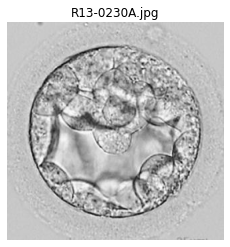

['R13-0154.jpg' 'R14-0646.jpg' 'R13-0140A.jpg' 'R14-0540.jpg'
 'R18-0004A.jpg' 'R14-0186.jpg']


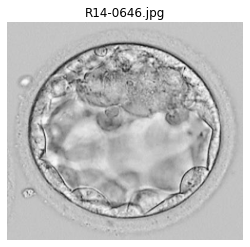

['R18-0004B.jpg' 'R13-0100A.jpg' 'R14-0013.jpg' 'R14-0611.jpg'
 'R13-0152B.jpg' 'R13-0079A.jpg']


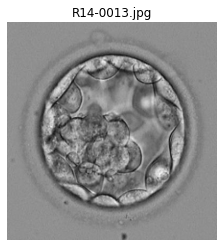

['R17-0537A.jpg' 'R12-0338B.jpg' 'R18-0108A.jpg' 'R14-0165B.jpg'
 'R16-0416B.jpg' 'R14-0447A.jpg']


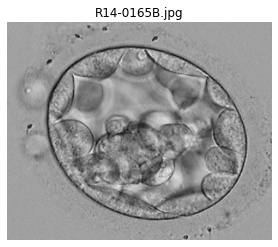

['R12-0396B.jpg' 'R14-0511B.jpg' 'R14-0190.jpg' 'R16-0338B.jpg'
 'R14-0644A.jpg' 'R17-0423.jpg']


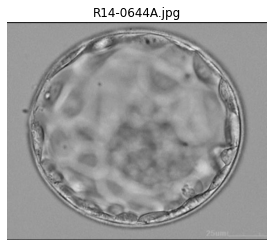

['R14-0638B.jpg' 'R15-0129B.jpg' 'R18-0020A.jpg' 'R13-0294.jpg'
 'R18-0017A.jpg' 'R16-0520.jpg']


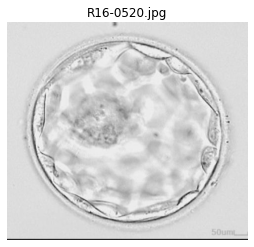

In [37]:
# Ploting random images
def plot_img():
    for i in range(6):
        select_img = np.random.choice(imgs, 6, replace = False)
        print(select_img)
        file = f'{train_dir}{select_img[i]}'
        file_load=image.load_img(file)
        plt.imshow(file_load)
        plt.title(select_img[i])
        plt.axis('off')
        plt.show()
plot_img()

There are five components in each blastocyst that needs to segmented which are trophoblast, blastocoel, Zona pellucida, inner cell mass and the cell background.

Inner cell mass: The blastocyst is a structure formed in the early development of mammals. It possesses an inner cell mass (ICM) which subsequently forms the embryo. This layer surrounds the inner cell mass and a fluid-filled cavity known as the blastocoel. Trophectoderm: The outer layer of the blastocyst consists of cells collectively called the trophoblast. The trophoblast gives rise to the chorion and amnion that surround the embryo. The trophectoderm which is a part of trophoblast does not become part of the fetus but does become some of the supporting structures, such as the placenta. Zona Pellucida: The zona pellucida is essential for oocyte growth and fertilization. Blastocoel: The blastocoel provides support for structural movement and becomes a fluid layer as part of the developing digestive tract. Cell Background: Background of the cell

**Semantic Segmentation** is the process of assigning a label to every pixel in the image. The componenets of Blastocyst images can be seperated by using semantic segmentation.

![blastocyst](R12-0090A.jpg)
Blastocyst
![Blastocoel](R12-0090A-Blastocoel.jpg)
blastocoel
![ICM](R12-0090A-ICM.jpg)
Inner Cell Mass
![TE](R12-0090A-TE.jpg)
Trophoblast
![ZP](R12-0090A-ZP.jpg)
Zona pellucida

In [38]:
#need to look into this code to understand image matrix

def img2np(path, list_of_filename, size = (64, 64)):
    # iterating through each file
    for fn in list_of_filename:
        fp = path + fn
        current_image = image.load_img(fp, target_size = size, 
                                       color_mode = 'grayscale')
        # convert image to a matrix
        img_ts = image.img_to_array(current_image)
        # turn that into a vector / 1D array
        img_ts = [img_ts.ravel()]
        try:
            # concatenate different images
            full_mat = np.concatenate((full_mat, img_ts))
        except UnboundLocalError: 
            # if not assigned yet, assign one
            full_mat = img_ts
    return full_mat

# run it on our folders
np_images = img2np(f'{train_dir}', imgs)

In [39]:
np_images

array([[178., 180., 179., ..., 176., 181., 175.],
       [189., 187., 185., ..., 181., 180., 184.],
       [169., 170., 161., ..., 165., 173., 163.],
       ...,
       [128., 127., 128., ..., 130., 109.,  93.],
       [172., 174., 173., ..., 171., 173., 169.],
       [194., 196., 195., ..., 166., 211., 193.]], dtype=float32)

In [40]:
df

,Label,Image,Height,Width,Channel
0,R12-0090A.jpg,<PIL.Image.Image image mode=RGB size=372x336 a...,336,372,3
1,R12-0090B.jpg,<PIL.Image.Image image mode=RGB size=362x326 a...,326,362,3
2,R12-0105A.jpg,<PIL.Image.Image image mode=RGB size=435x385 a...,385,435,3
3,R12-0105B.jpg,<PIL.Image.Image image mode=RGB size=428x401 a...,401,428,3
4,R12-0169A.jpg,<PIL.Image.Image image mode=RGB size=429x398 a...,398,429,3
...,...,...,...,...,...
587,R18-0318A.jpg,<PIL.Image.Image image mode=RGB size=486x394 a...,394,486,3
588,R18-0318B.jpg,<PIL.Image.Image image mode=RGB size=434x375 a...,375,434,3
589,R18-0321A.jpg,<PIL.Image.Image image mode=RGB size=514x462 a...,462,514,3
590,R18-0321B.jpg,<PIL.Image.Image image mode=RGB size=393x366 a...,366,393,3


**Data Quality**

The dataset consists of 592 RGB images with average height of 398.28 pixel and Width of 435.48 pixel.
The total images has 156 unique height and 196 unique width.
There are 3 channels in each image. The quality of image is good to train the model on sprint semantic segmentation.

In [41]:
df[["Height", "Width", "Channel"]].nunique()

Height     156
Width      196
Channel      1
dtype: int64

In [42]:
df['Height'].mean()

398.2837837837838

In [43]:
df['Width'].mean()

435.48986486486484

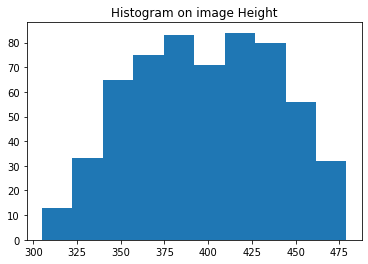

In [44]:
plt.hist(df['Height'])
plt.title("Histogram on image Height")
plt.show()

**The height of images in the dataset is normally distributed and does not have any skewness.**

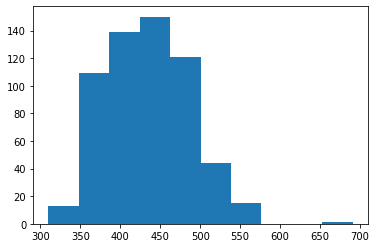

In [45]:
plt.hist(df['Width'])
plt.show()

**The width of the image is normally distributed and we can observe an outlier which can be considered as an exception.**

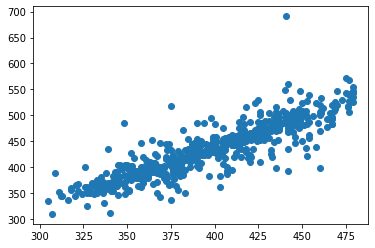

In [46]:
plt.scatter(x=df['Height'],y=df['Width'])

**The above scatter plot demonstrates the distribution of height and width of the images in the dataset.**

In [47]:
#pip install deon

**Data Fitness**

The dataset consists of 592 unique images which wouldn't be sufficient for training the model. Therefore we would use Data augmentation to add more training data. Data Augmentation would be used to increase the amount of data by adding slightly modified copies of already existing data.

Yes, we would employ this dataset to answer the research question.

This dataset was approved by the **Canadian Research Ethics Board** on 24 May 2017.

**Consent**

The data is publicly available to everyone in the form of an image dataset, and it is used only for experimental purposes. It contains the images of an embryo(blastocyst) and the components, for which we need to find the confidence percentage, area, radius, and thickness to identify whether it is the right embryo to transfer or not. There is no information provided about the details of patients, whose embryo images are taken at PCRM by using an Olympus IX71 inverted microscope during the years between 2012 and 2016.

**Clarity**

Clarity is closely related to consent because its unethical to do anything without the proper consent and it should be clearly mentioned about how the data is going to be used. We are using this data to accurately identify the embryo to improve the success rate of in-vitro fertilization. In this analysis, we will use sprint semantic segmentation network (SSS-Net) to automatically detect the components of blastocysts, whose specific morphologies are considered to determine the viability of an embryo for in-vitro fertilization.

**Consistency**

The data is safeguarded in a vault at Simon Fraser University, but it is publicly available to everyone for experimental purposes. There is no personal information about the details of patients available for this dataset. This image dataset is using only to detect the embryos for improving the in-vitro fertilization success rate.

**Control**

We should have the control on the data, on how its going to be used. The data can be accessed by everyone because it is publicly available, and it is using only for research purposes in various health sectors.

**Consequences**

The finding from the analysis of the dataset is using only to improve the success rate of in-vitro fertilization. There would not be any consequences due to the use of the dataset unless the personal information is provided.

**Github repository links**

Collaborate Link : https://github.com/anjanapv/AI-ML-Project---Detecting-Embryo-Components-to-Improve-Success-Rate-of-IVF

Nobin Ann Mathew: https://github.com/NobinMath

Anjana Padikkal Veetil: https://github.com/anjanapv

Amal Mathew: https://github.com/Amalmathew5

Venkata Bhagya Teja Maridu :https://github.com/tejamaridu

Santosh Kumar Kantimahanti Lakshmi Venkata :https://github.com/santoshkumarklv






